<a href="https://colab.research.google.com/github/maiemahmoud/Noise-reduction/blob/main/AutoEncoder_for_noise_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from tensorflow.keras.utils import img_to_array

In [ ]:
# -*- coding: utf-8 -*-
"""skin_cancer_classification.ipynb
 
Automatically generated by Colaboratory.
 
Original file is located at
    https://colab.research.google.com/drive/1LTnnuuFhYOLPaIscr-ktWCepLocIVee1
"""
 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

# x is noisy data and y is clean data
SIZE = 320

In [ ]:
from tqdm import tqdm
noisy_data=[]
path1 = 'gdrive/My Drive/noise_ofdm/noisy_images/'
files=os.listdir(path1)
for i in tqdm(files):
    img=cv2.imread(path1+'/'+i,0)   #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    noisy_data.append(img_to_array(img))

100%|██████████| 50/50 [00:00<00:00, 226.22it/s]


In [ ]:

clean_data=[]
path2 = 'gdrive/My Drive/noise_ofdm/clean_images/'
files=os.listdir(path2)
for i in tqdm(files):
    img=cv2.imread(path2+'/'+i,0)  #Change 0 to 1 for color images
    img=cv2.resize(img,(SIZE, SIZE))
    clean_data.append(img_to_array(img))

100%|██████████| 50/50 [00:00<00:00, 287.06it/s]


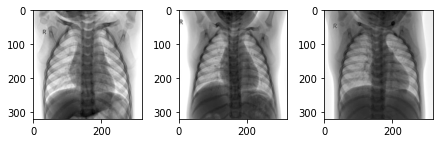

In [ ]:
#Displaying images with noise
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_data[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()

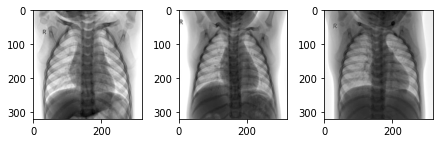

In [ ]:
#Displaying clean images
plt.figure(figsize=(10, 2))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i].reshape(SIZE, SIZE), cmap="binary")
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 320, 320, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 160, 160, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 160, 160, 8)       2312      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 80, 80, 8)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 80, 80, 8)         584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 40, 40, 8)       

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(noisy_train, clean_train, 
                                                    test_size = 0.20, random_state = 0)


model.fit(x_train, y_train, epochs=10, batch_size=8, shuffle=True, verbose = 1,
          validation_split = 0.1)

Epoch 1/10
5/5 [==============================] - 13s 2s/step - loss: 0.1854 - accuracy: 0.0763 - val_loss: 0.0330 - val_accuracy: 0.0408
Epoch 2/10
5/5 [==============================] - 10s 2s/step - loss: 0.0592 - accuracy: 0.0728 - val_loss: 0.0320 - val_accuracy: 0.0408
Epoch 3/10
5/5 [==============================] - 11s 2s/step - loss: 0.0374 - accuracy: 0.0763 - val_loss: 0.0473 - val_accuracy: 0.0408
Epoch 4/10
5/5 [==============================] - 11s 2s/step - loss: 0.0389 - accuracy: 0.0763 - val_loss: 0.0271 - val_accuracy: 0.0408
Epoch 5/10
5/5 [==============================] - 11s 2s/step - loss: 0.0266 - accuracy: 0.0763 - val_loss: 0.0212 - val_accuracy: 0.0408
Epoch 6/10
5/5 [==============================] - 10s 2s/step - loss: 0.0214 - accuracy: 0.0763 - val_loss: 0.0166 - val_accuracy: 0.0408
Epoch 7/10
5/5 [==============================] - 11s 2s/step - loss: 0.0164 - accuracy: 0.0764 - val_loss: 0.0137 - val_accuracy: 0.0408
Epoch 8/10
5/5 [==================

1/1 [==============================] - 1s 553ms/step - loss: 0.0112 - accuracy: 0.0901
Test_Accuracy: 9.01%


1/1 [==============================] - 1s 650ms/step


'\nplt.figure(figsize=(40, 4))\nfor i in range(10):\n    # display original\n    ax = plt.subplot(3, 20, i + 1)\n    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")\n    \n    # display reconstructed (after noise removed) image\n    ax = plt.subplot(3, 20, 40 +i+ 1)\n    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")\n\nplt.show()\n\n'

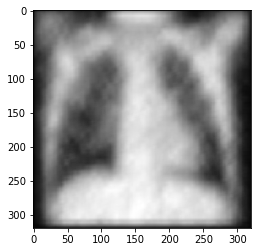

In [ ]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))


model.save('denoising_autoencoder.model')

no_noise_img = model.predict(x_test)


plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")
#plt.imsave('sandstone/denoised_images/denoised_image.tif', no_noise_img[3].reshape(SIZE,SIZE))

"""
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(y_test[i].reshape(SIZE,SIZE), cmap="gray")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(SIZE,SIZE), cmap="gray")

plt.show()

"""



